<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width = '200' align = 'right'>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

### 1) 분류/회귀 문제
**(Urclass Quiz)** 다이아몬드를 보관하기 위해 금고를 만들었습니다. 금고가 너무 작아서 가격이 상위 25%인 것만 보관하려고 합니다. 이를 위해 `price` 특성을 이용해 금고에 보관할 다이아몬드와 그렇지 않은 것으로 분류하는 이진분류 컬럼을 만들어 타겟 특성으로 사용할 것입니다. 타겟 특성의 최빈값의 빈도수를 적어주세요.
- `top25`라는 새로운 타겟변수(컬럼)를 만들어 주세요.
- `price` 값이 상위 25% 이상이면 `True`, 상위 25% 미만이면 `False`가 되도록 `top25`에 저장하세요.


In [3]:
### 이곳에서 과제를 진행해 주세요 ### 
import seaborn as sns
diamonds = sns.load_dataset('diamonds')

### 2) 데이터 누수(Data leakage)
- 특성 `X`와 타겟 `y`를 분리하여 저장하세요.
  - 특성은 타겟을 제외한 모든 컬럼입니다. 
- `X`와 `y` 데이터를 훈련/검증 세트로 나누세요. 
  - 훈련과 검증 세트의 비는 8:2로 합니다.
  - `random_state=2`로 설정합니다. 
- 결정트리 모델을 학습시키세요. 
  - `random_state=2`로 설정합니다.
- **(Urclass Quiz) 검증 세트의 정확도를 제출하세요.** 
- **(Urclass Quiz) 검증 세트의 정확도는 적절한가요? 적절하지 않은가요? 그 이유를 한 문장으로 설명하세요.**
- **(Urclass Quiz) 검증 세트의 정확도가 적절하지 않다면 문제를 파악하여 해결하고, 모델을 다시 학습한 다음 검증 세트의 정확도를 제출하세요.** 

In [2]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 918 kB/s 


In [4]:
diamonds.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [4]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamonds.duplicated().sum()

146

In [6]:
diamonds.drop_duplicates(inplace = True)

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,top25
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [7]:
import numpy as np

In [8]:
diamonds['top25'] = np.where(diamonds['price'] >= np.percentile(diamonds['price'], 75), 1, 0)

In [10]:
diamonds.top25.value_counts()

0    40345
1    13449
Name: top25, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

features = diamonds.drop('top25', axis = 1).columns
target = 'top25'

X = diamonds[features]
y = diamonds[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

X_train.size


430350

In [17]:
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=5, random_state = 2),
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


1.0

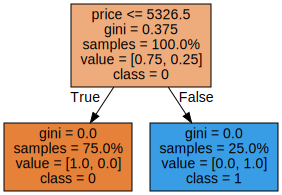

In [18]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

In [19]:
X_train.drop('price', axis = 1, inplace = True)
X_test.drop('price', axis = 1, inplace = True)

In [20]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9554791337484896

In [ ]:
tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

## 🔥 도전과제(Github - Discussion)

> 이번 스프린트에서는 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 도전과제를 수행합니다. 세션이 진행됨에 따라 차례로 도전과제를 수행하며 모델 해석까지 진행해 볼 수 있습니다. <br>
단, 도전과제는 optinal입니다. 우선은 여러분이 선택한 문제를 왜 해결해야 하는지, 해결함으로써 어떤 가치가 창출되는지 충분히 고민해 보세요. 그리고 프로젝트를 위한 데이터셋을 최종 선택하기까지 여러 가능한 데이터셋을 살펴보고, 해당 데이터셋이 해결하고자 하는 문제를 풀기에 적절한지 먼저 검토해 보시기 바랍니다. 

### 1) 타겟으로 사용할 특성을 선택합니다.
여러분들이 프로젝트에 사용할 데이터셋과 타겟 특성에 대하여 다음 내용을 포함해 간략히 설명하세요. 
- `df.dtypes`를 사용해서 타겟 특성의 데이터 타입 확인
- `df.describe()`를 사용해서 타겟 특성의 통계치 확인(실수형: 평균값 , 범주형: 최빈값)

In [32]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.

In [36]:
data_enc.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,2,1,2,1,2,2,2,1
2,2,2,2,2,1,1,1,1,1,1,2,1,2,1
3,2,3,3,1,1,1,1,1,2,1,2,1,2,1
4,2,2,3,1,1,1,1,2,2,2,3,1,2,2


### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류
  - 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)?
  - 다수 클래스(majority class) 비율이 50%~70%인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀
  - 타겟 분포가 right-skewed인지? log-transform을 사용할 것인지? 
  - MAE, RMSE, $R^2$ 등을 사용할 수 있습니다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 